### Graph Representation

In [1]:
nodes={"A","B","C","D"}
edges={("A","B"),("B","C"),("C","A"),("C","D")}

In [2]:
nodes

{'A', 'B', 'C', 'D'}

In [3]:
edges

{('A', 'B'), ('B', 'C'), ('C', 'A'), ('C', 'D')}

### Adjacency List

In [4]:
nodes=["A","B","C","D"]
print(nodes)

['A', 'B', 'C', 'D']


In [5]:
nodes_dict={"A":0,"B":1,"C":2,"D":3} #Create dictionary of nodes to indices
nodes_dict={k:i for i,k in enumerate(nodes)} #same as above,done programmatically
print(nodes_dict)

{'A': 0, 'B': 1, 'C': 2, 'D': 3}


In [6]:
adj_list=[[1],[2],[0,3],[]]

In [7]:
adj_list

[[1], [2], [0, 3], []]

### Page Rank

In [12]:
import numpy as np

In [17]:
#𝐴:=  adjacency matrix of 𝐺
#𝑃:= replace all-zero columns of 𝐴 with all-ones, and normalize columns
#𝑃̂ :=(1−𝑑)𝑃+𝑑∣𝑉∣(11𝑇)
#𝑥:=1∣𝑉∣1
#Repeat 𝑇 times:
#𝑥:=𝑃̂ 𝑥
#Page Rank Algorithm
A=np.array([[0,0,1,0],[1,0,0,0],[0,1,0,0],[0,0,1,0]])
d=0.1
T=1000
P=A.copy()
P[:,P.sum(0)==0]=1
P=P/(P.sum(0)+1e-10)
Phat=(1-d)*P+d/A.shape[0]*np.ones(A.shape)
x = np.ones(A.shape[0])/A.shape[0]
for _ in range(T):
    x = Phat @ x
    x = x/x.sum()
print(x)

[0.21260745 0.26418338 0.31060172 0.21260745]


### Creating Graphs

In [18]:
import networkx as nx

In [19]:
G_undirected=nx.Graph() #Creating undirected graph
G_directed=nx.DiGraph()  #Creating directed graph

In [20]:
G=nx.Graph()
G.add_node("A")  #Adding Nodes
G.add_nodes_from(["B","C"])
print(G.nodes())

['A', 'B', 'C']


In [21]:
G.remove_nodes_from(["A","C"])
print(G.nodes())

['B']


In [22]:
G.add_nodes_from(["A","C"])
G.remove_node("B")
print(G.nodes())

['A', 'C']


In [24]:
G=nx.DiGraph()
G.add_edges_from([("A","B"),("B","C"),("C","A"),("C","D")])
print(G.nodes())
print(G.edges())

['A', 'B', 'C', 'D']
[('A', 'B'), ('B', 'C'), ('C', 'A'), ('C', 'D')]


In [25]:
G.remove_edge("A","B")
print(G.edges())

[('B', 'C'), ('C', 'A'), ('C', 'D')]


In [27]:
G.remove_edges_from([("A","B"),("B","C")])
print(G.edges())

[('C', 'A'), ('C', 'D')]


In [28]:
G.remove_node("A")
print(G.edges())

[('C', 'D')]


In [29]:
G=nx.DiGraph()
G.add_edge("A","B",weight=1.0)
G.add_edges_from([("A","B"),("B","C"),("C","D"),("C","A")],weight=4.0)

In [30]:
print(G.edges())

[('A', 'B'), ('B', 'C'), ('C', 'D'), ('C', 'A')]


### Internal Representations and node/edge data

In [31]:
G=nx.DiGraph()
G.add_edges_from([("A","B"),("B","C"),("C","A"),("C","D")])
print(G["C"])

{'A': {}, 'D': {}}


In [32]:
G["A"]["B"]["color"]="red"
G["A"]["B"]["weight"]=1.0
print(G["A"]["B"])

{'color': 'red', 'weight': 1.0}


In [33]:
G.node["A"]["color"]="blue"
print(G.node["A"])

{'color': 'blue'}


In [34]:
print(G.nodes())
print(G.edges())

['A', 'B', 'C', 'D']
[('A', 'B'), ('B', 'C'), ('C', 'A'), ('C', 'D')]


In [35]:
print(G.nodes(data=True))  #Returning data
print(G.edges(data=True))

[('A', {'color': 'blue'}), ('B', {}), ('C', {}), ('D', {})]
[('A', 'B', {'color': 'red', 'weight': 1.0}), ('B', 'C', {}), ('C', 'A', {}), ('C', 'D', {})]


### Drawing Graphs

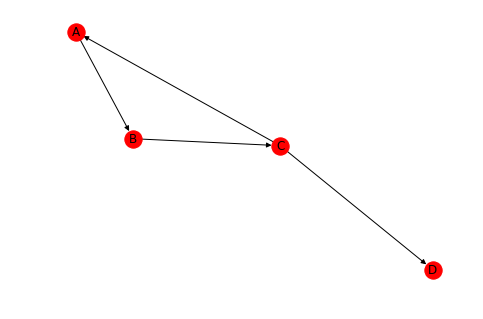

In [37]:
G = nx.DiGraph()
G.add_edges_from([("A","B"), ("B","C"), ("C","A"), ("C","D")])
nx.draw(G, with_labels=True)

### Graph Algorithms

In [39]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'


In [42]:
G = nx.Graph()
G.add_edges_from([("A","B"), ("B","C"), ("C","A"), ("C","D")])
print(nx.shortest_path_length(G, source="A"))
print(nx.shortest_path(G, source="A"))

{'A': 0, 'B': 1, 'C': 1, 'D': 2}
{'A': ['A'], 'B': ['A', 'B'], 'C': ['A', 'C'], 'D': ['A', 'C', 'D']}


In [43]:
#The PageRank implementation takes an alpha parameters which is  1−𝑑  is our notation
G = nx.DiGraph()
G.add_edges_from([("A","B"), ("B","C"), ("C","A"), ("C","D")])
nx.pagerank(G, alpha=0.9) 

{'A': 0.2126075277037968,
 'B': 0.2641838185655828,
 'C': 0.31060112602682377,
 'D': 0.2126075277037968}

In [44]:
#Girvan-Newman returns the dendrogram as a sequence of successive breakdowns of the nodes
G = nx.Graph()
G.add_edges_from([(1,2), (1,3), (2,3), (4,5), (4,6), (5,6), 
                  (9,10), (9,11), (10,11), (12,13), (12,14), (13,14),
                  (3,7), (6,7), (7,8), (8,9), (8,12)])
communities = nx.community.girvan_newman(G)
list(communities)

[({1, 2, 3, 4, 5, 6, 7}, {8, 9, 10, 11, 12, 13, 14}),
 ({1, 2, 3}, {4, 5, 6, 7}, {8, 9, 10, 11, 12, 13, 14}),
 ({1, 2, 3}, {4, 5, 6, 7}, {9, 10, 11}, {8, 12, 13, 14}),
 ({1, 2, 3}, {4, 5, 6}, {9, 10, 11}, {8, 12, 13, 14}, {7}),
 ({1, 2, 3}, {4, 5, 6}, {9, 10, 11}, {12, 13, 14}, {7}, {8}),
 ({1}, {2, 3}, {4, 5, 6}, {9, 10, 11}, {12, 13, 14}, {7}, {8}),
 ({1}, {2}, {3}, {4, 5, 6}, {9, 10, 11}, {12, 13, 14}, {7}, {8}),
 ({1}, {2}, {3}, {4}, {5, 6}, {9, 10, 11}, {12, 13, 14}, {7}, {8}),
 ({1}, {2}, {3}, {4}, {5}, {6}, {9, 10, 11}, {12, 13, 14}, {7}, {8}),
 ({1}, {2}, {3}, {4}, {5}, {6}, {9}, {10, 11}, {12, 13, 14}, {7}, {8}),
 ({1}, {2}, {3}, {4}, {5}, {6}, {9}, {10}, {11}, {12, 13, 14}, {7}, {8}),
 ({1}, {2}, {3}, {4}, {5}, {6}, {9}, {10}, {11}, {12}, {13, 14}, {7}, {8}),
 ({1}, {2}, {3}, {4}, {5}, {6}, {9}, {10}, {11}, {12}, {13}, {14}, {7}, {8})]